# Task: Cancer Diagnosis using NN

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [2]:
data = pd.read_csv('Cancer_data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.shape

(569, 32)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [7]:
# Get the x and y data
x = data.iloc[:, 2:]
y = pd.DataFrame(data['diagnosis'])

## One hot encoder

In [8]:
from sklearn.preprocessing import LabelEncoder

### encode the target

In [9]:
label_encoder = LabelEncoder()
y_encode = label_encoder.fit_transform(y.values.ravel())

## Feature Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [16]:
x_scaled = sc.fit_transform(x)

## Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encode, test_size = 0.2,\
                                                    random_state = 0)

## size/shape of dataframe

In [18]:
n_samples = x_train.shape[0]
n_features = x_train.shape[1]

## Make the NN using sequential API

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(n_features,)))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\mynam\Downloads\DEEP LEARNING I\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Make the NN using functional API

In [21]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape=(n_features,))
hidden_layer_1 = Dense(units=512, kernel_initializer='uniform', activation='tanh')(input_layer)
hidden_layer_2 = Dense(units=256, kernel_initializer='uniform', activation='sigmoid')(hidden_layer_1)
output_layer = Dense(units=1, kernel_initializer='uniform', activation='sigmoid')(hidden_layer_2)
my_classifier = Model(inputs=input_layer, outputs=output_layer)
# Compiling the ANN
my_classifier.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])


## plot the model

In [35]:
import pydot
import graphviz
from tensorflow.keras.utils import plot_model

plot_model(my_classifier, to_file='model.png', show_shapes=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [24]:
my_classifier.summary()




Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │        15,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,457 (576.00 KB)

 Trainable params: 147,457 (576.00 KB)

 Non-trainable params: 0 (0.00 B)

## Fitting the ANN to the Training set

In [25]:
history = my_classifier.fit(x_train, y_train, validation_split=0.2,
                            batch_size = 10, epochs = 100)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5585 - loss: 0.6911 - val_accuracy: 0.6044 - val_loss: 0.6663
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6433 - loss: 0.6420 - val_accuracy: 0.6044 - val_loss: 0.6596
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6674 - loss: 0.6159 - val_accuracy: 0.6044 - val_loss: 0.6347
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6820 - loss: 0.5960 - val_accuracy: 0.6154 - val_loss: 0.6183
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6816 - loss: 0.5906 - val_accuracy: 0.6044 - val_loss: 0.6076
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6657 - loss: 0.5783 - val_accuracy: 0.6154 - val_loss: 0.5962
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6401 - loss: 0.5675 - val_accuracy: 0.6154 - val_loss: 0.5813
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6599 - loss: 0.5574 - val_accuracy: 0.6923 - 

## Make predictions
### Predicting the Train set results

In [26]:
# Make predictions
# Predicting the Test set results
y_pred_train = my_classifier.predict(x_train)
y_pred_train = (y_pred_train > 0.5)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


### Predicting the Test set results

In [27]:
# Predicting the Test set results
y_pred_test = my_classifier.predict(x_test)
y_pred_test = (y_pred_test > 0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


### Making the Confusion Matrix

In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[65,  2],
       [ 3, 44]], dtype=int64)

### list all the data in history

In [29]:
# list all the data in history
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### Plot the accuracy for both train and validation set

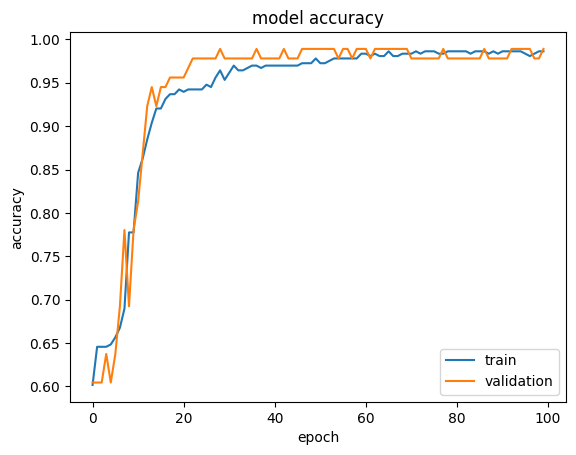

In [59]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

### Plot the loss for both train and validation set

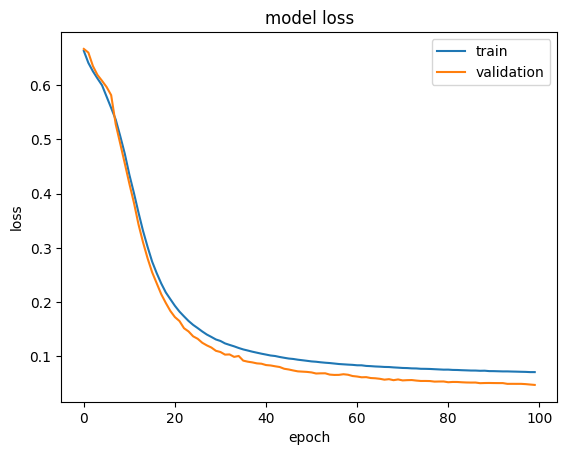

In [31]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

## Implement Callbacks

In [32]:
import tensorflow as tf

In [33]:
class myCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs={}): # this method will be called everytime at the end of each epoch
        if(logs.get('loss')<0.03):
            print("\nReached 97% accuracy so cancelling training!")
            self.model.stop_training = True
            
callback = myCallback()

In [34]:
history = my_classifier.fit(x_train, y_train, validation_split=0.2,
                            batch_size = 10, epochs = 100, callbacks= [callback])

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9913 - loss: 0.0505 - val_accuracy: 0.9780 - val_loss: 0.0478
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9852 - loss: 0.0807 - val_accuracy: 0.9780 - val_loss: 0.0482
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9952 - loss: 0.0503 - val_accuracy: 0.9890 - val_loss: 0.0486
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9813 - loss: 0.0699 - val_accuracy: 0.9780 - val_loss: 0.0478
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9907 - loss: 0.0527 - val_accuracy: 0.9780 - val_loss: 0.0478
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9913 - loss: 0.0620 - val_accuracy: 0.9890 - val_loss: 0.0484
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9938 - loss: 0.0510 - val_accuracy: 0.9890 - val_loss: 0.0486
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9889 - loss: 0.0642 - val_accuracy: 0.9890 - v